# Bank Marketing
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).\

Attribute Information:
Bank client data:
- Age (numeric)
- Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
- Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

Related with the last contact of the current campaign:
- Contact: contact communication type (categorical:'cellular','telephone')
- Month: last contact month of year (categorical: 'jan', 'feb', 'mar',…, 'nov', 'dec')
- Day_of_week: last contact day of the week (categorical:'mon','tue','wed','thu','fri')
- Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:
- Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- Previous: number of contacts performed before this campaign and for this client (numeric)
- Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes:
- Emp.var.rate: employment variation rate - quarterly indicator (numeric)
- Cons.price.idx: consumer price index - monthly indicator (numeric)
- Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- Euribor3m: euribor 3 month rate - daily indicator (numeric)
- Nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [142]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#to make the output look nicer
np.set_printoptions(suppress=True, precision = 2)

In [143]:
# load data from the page
bank = pd.read_csv('bank-additional-full.csv', sep = ';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [144]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [145]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype='object')

In [146]:
# unique categorical variables
bank.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [147]:
bank.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [148]:
bank.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [149]:
# basic statistical data
bank.describe().round(1)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0
mean,40.0,258.3,2.6,962.5,0.2,0.1,93.6,-40.5,3.6,5167.0
std,10.4,259.3,2.8,186.9,0.5,1.6,0.6,4.6,1.7,72.3
min,17.0,0.0,1.0,0.0,0.0,-3.4,92.2,-50.8,0.6,4963.6
25%,32.0,102.0,1.0,999.0,0.0,-1.8,93.1,-42.7,1.3,5099.1
50%,38.0,180.0,2.0,999.0,0.0,1.1,93.7,-41.8,4.9,5191.0
75%,47.0,319.0,3.0,999.0,0.0,1.4,94.0,-36.4,5.0,5228.1
max,98.0,4918.0,56.0,999.0,7.0,1.4,94.8,-26.9,5.0,5228.1


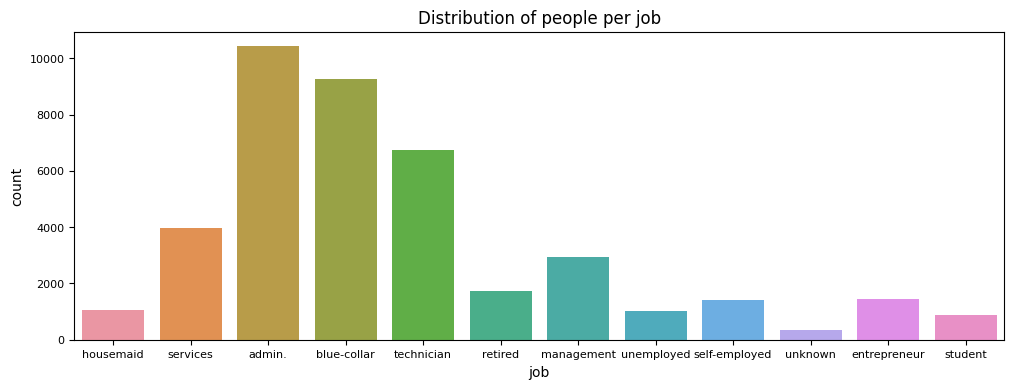

<Figure size 640x480 with 0 Axes>

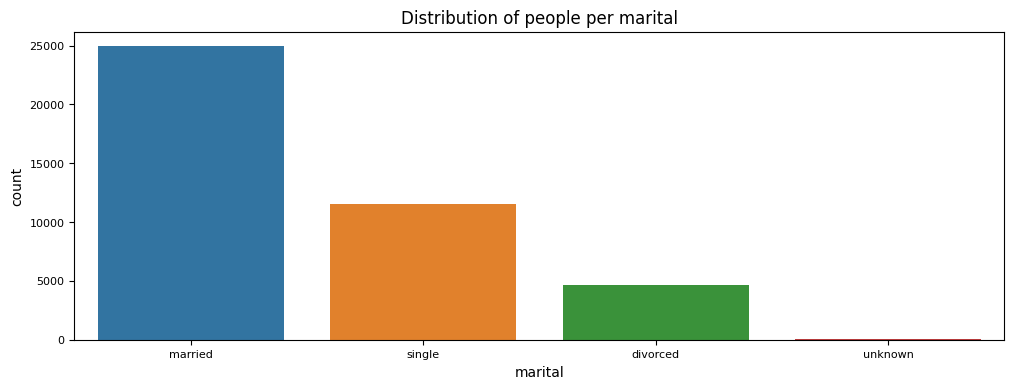

<Figure size 640x480 with 0 Axes>

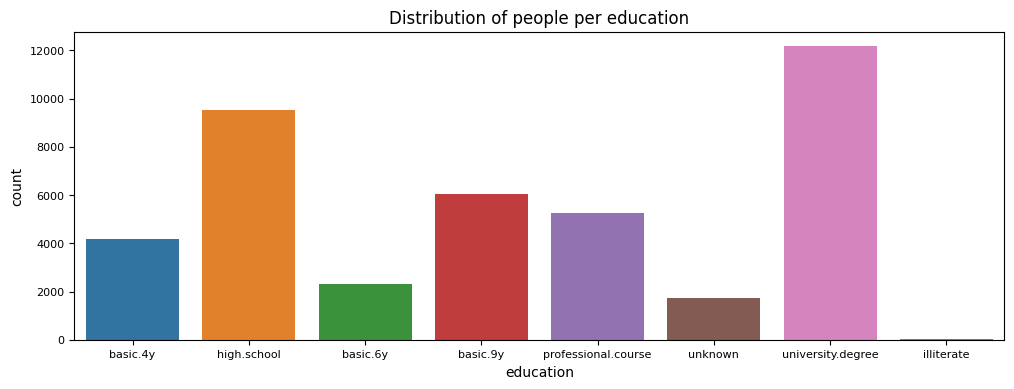

<Figure size 640x480 with 0 Axes>

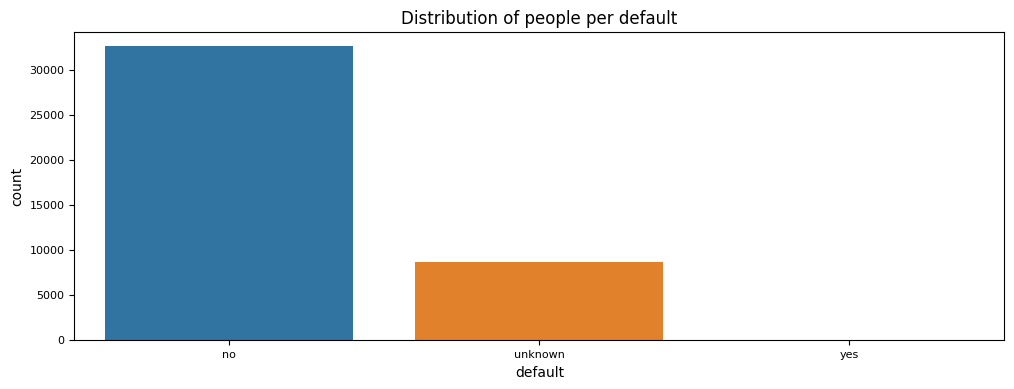

<Figure size 640x480 with 0 Axes>

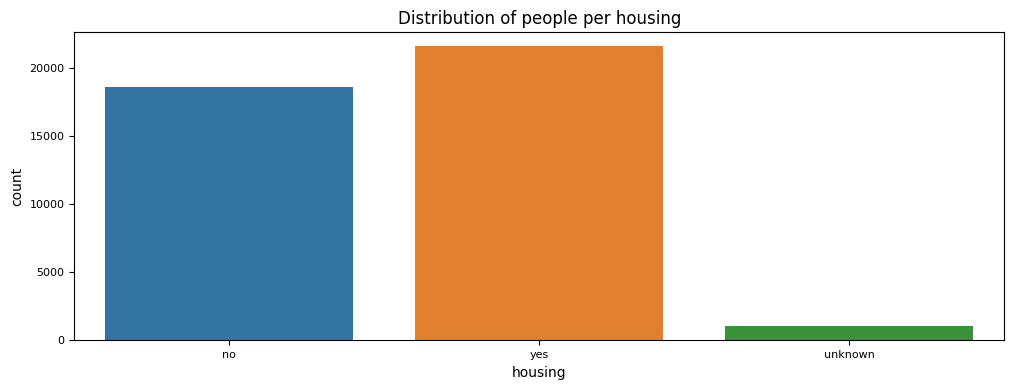

<Figure size 640x480 with 0 Axes>

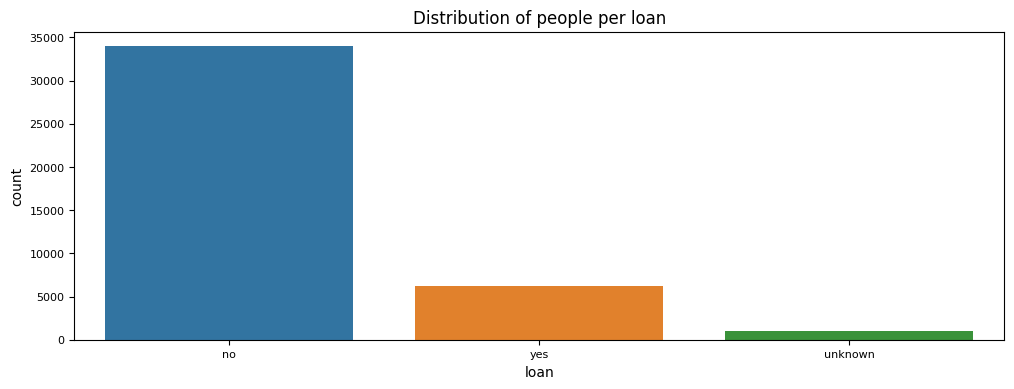

<Figure size 640x480 with 0 Axes>

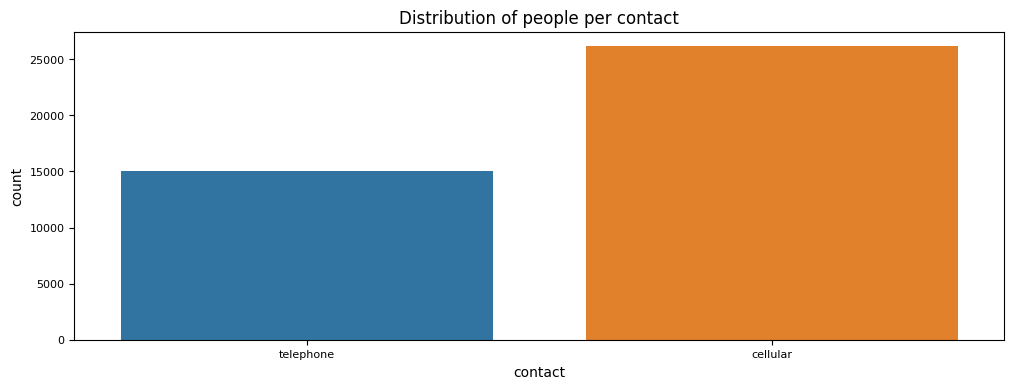

<Figure size 640x480 with 0 Axes>

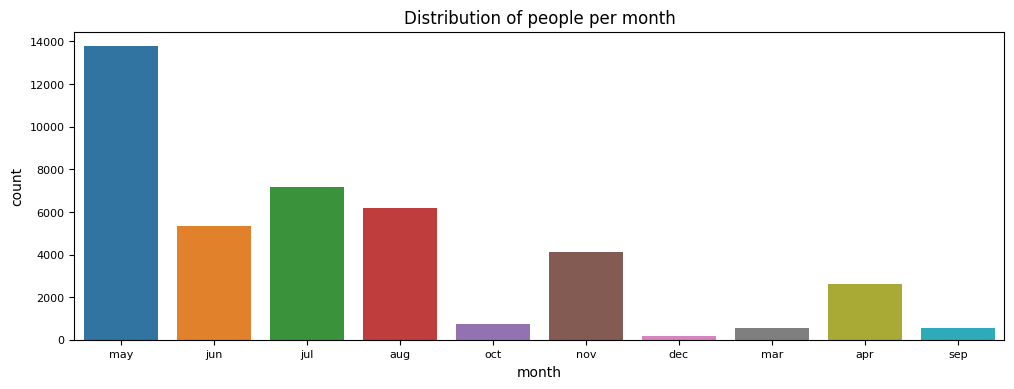

<Figure size 640x480 with 0 Axes>

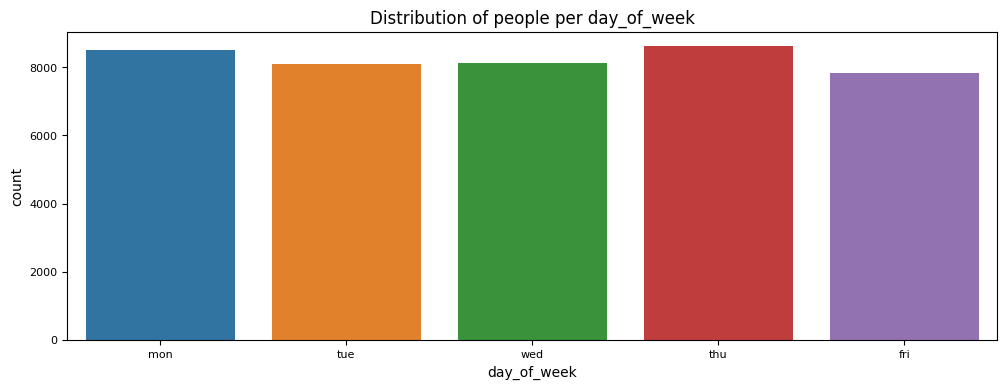

<Figure size 640x480 with 0 Axes>

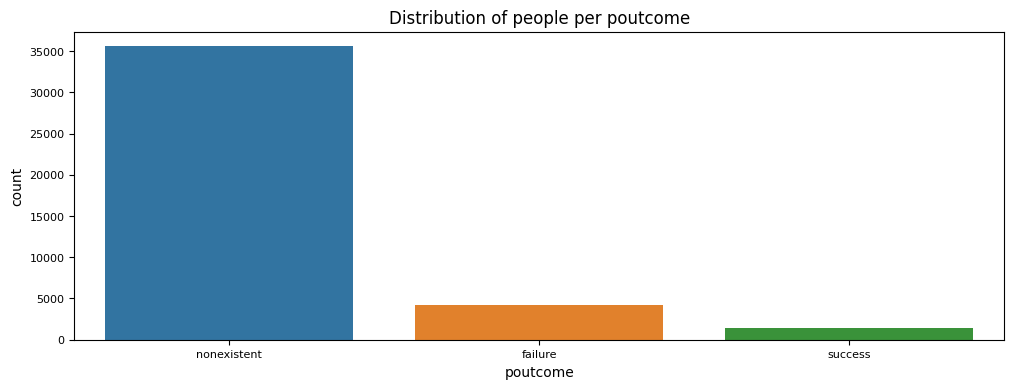

<Figure size 640x480 with 0 Axes>

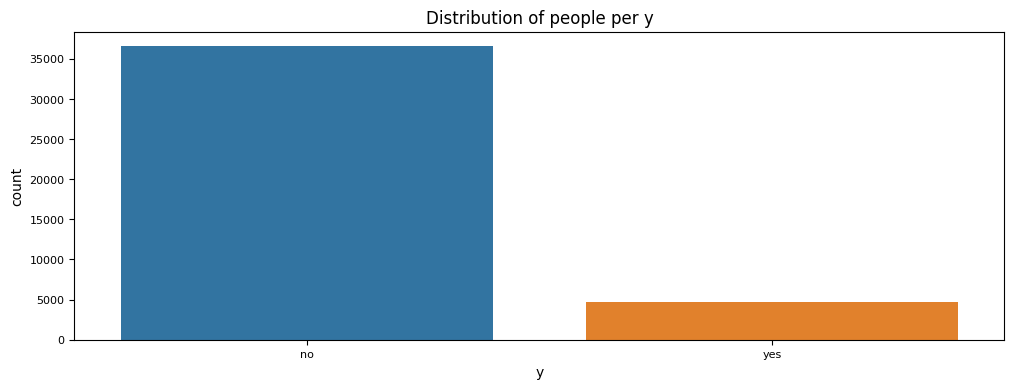

<Figure size 640x480 with 0 Axes>

In [150]:
# categorical variables distribution
categorical_cols = bank.select_dtypes(include=['object', 'bool']).columns

for column in categorical_cols:
    plt.figure(figsize=(12, 4))
    sns.countplot(x=column, data=bank)
    plt.title('Distribution of people per {}'.format(column))
    plt.tick_params(labelsize=8)
    plt.show()
    plt.clf()

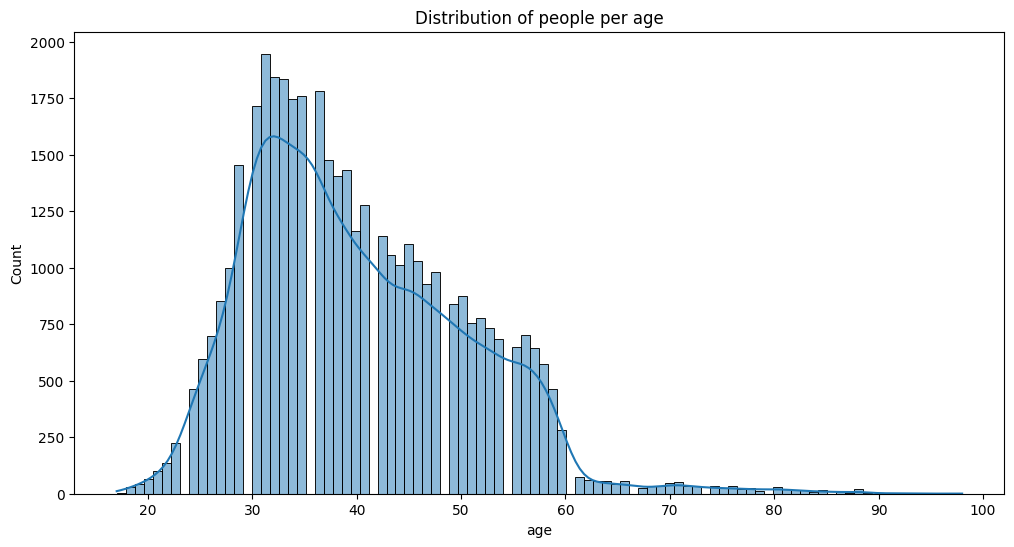

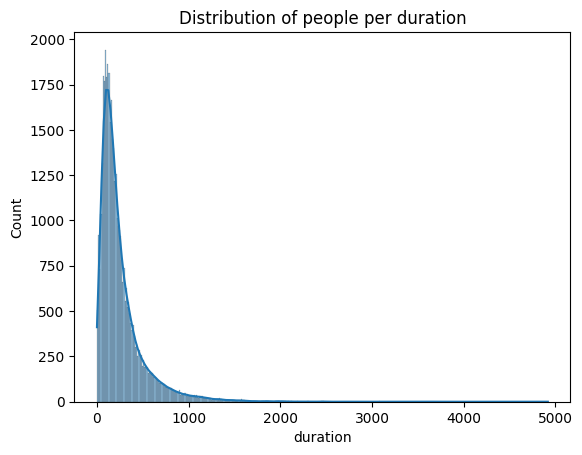

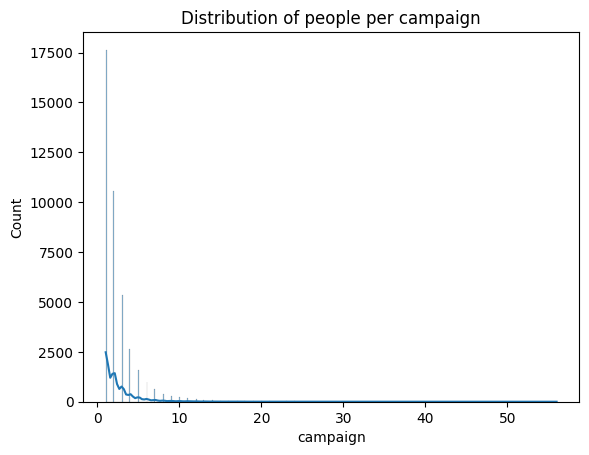

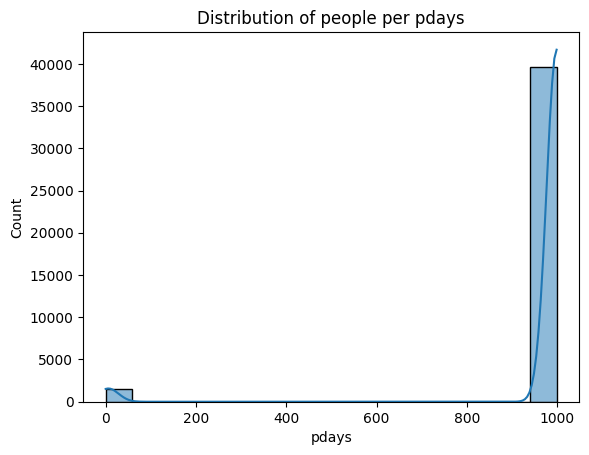

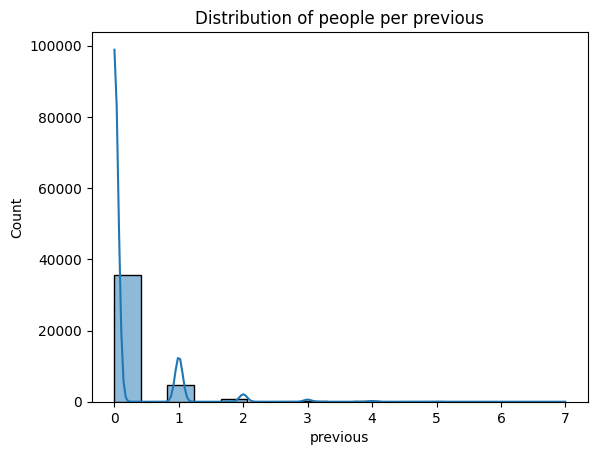

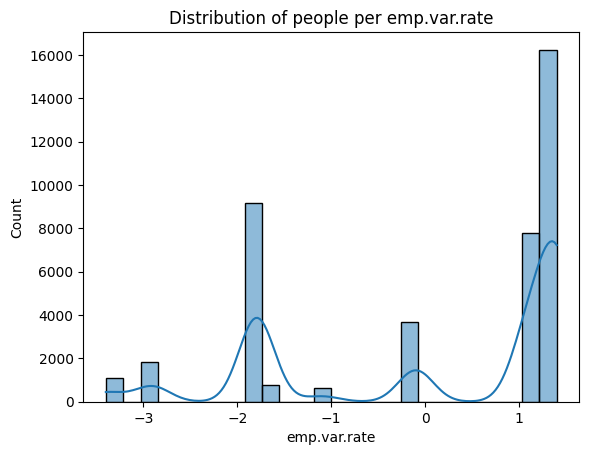

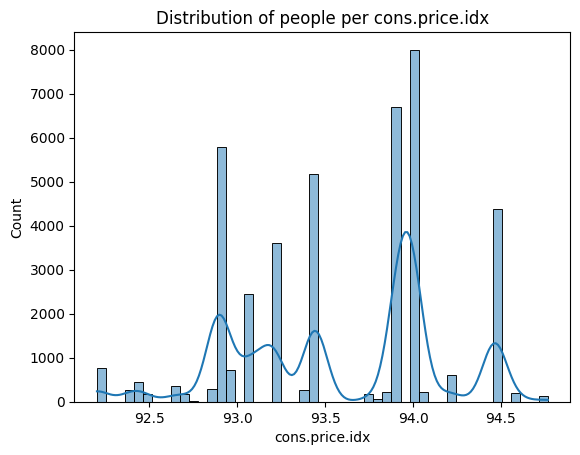

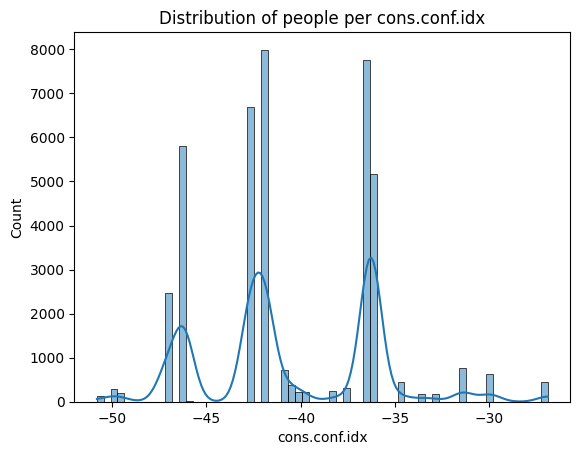

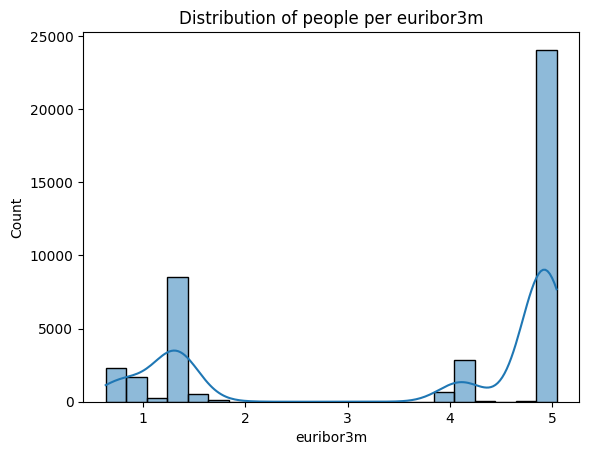

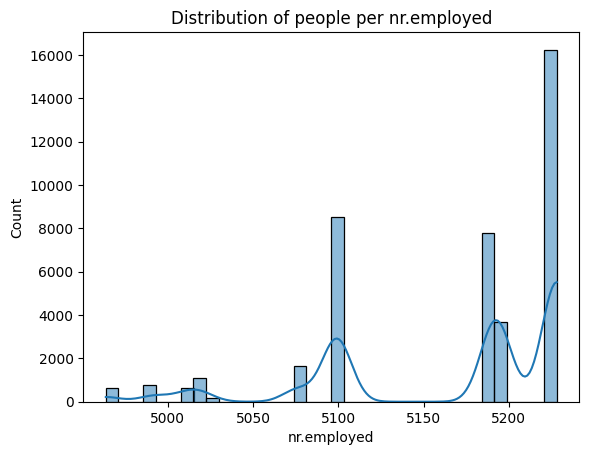

In [151]:
# numerical variables distribution
numerical_cols = bank.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 6))
for col in numerical_cols:
    sns.histplot(bank[col], kde=True, label=col, alpha=0.5)
    plt.title('Distribution of people per {}'.format(col))
    plt.show()

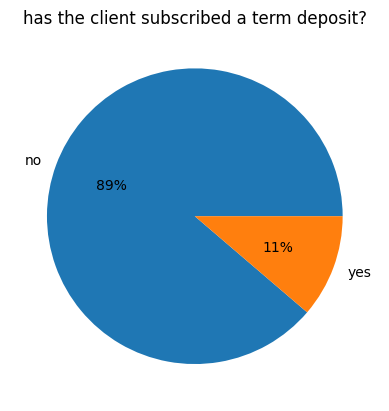

In [252]:
# checking if target output in data is balanced
#1=Yes and 0=No
target_var = pd.crosstab(index = bank['y'], columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('has the client subscribed a term deposit?')
plt.show()

# Analyze Age feature

In [152]:
bank.describe()['age'].round(1)

count    41188.0
mean        40.0
std         10.4
min         17.0
25%         32.0
50%         38.0
75%         47.0
max         98.0
Name: age, dtype: float64

The right skewed distribution indicate that there are outliers within 3rd percentile. and the majority of the population falls into younger age groups, with fewer individuals in the older age ranges.

In [153]:
# calculate outliers
print('Ages above: ', bank['age'].quantile(q = 0.75) + 
                      1.5*(bank['age'].quantile(q = 0.75) - bank['age'].quantile(q = 0.25)), 'are outliers')

Ages above:  69.5 are outliers


In [154]:
print('Numerber of outliers: ', bank[bank['age'] > 69.6]['age'].count())
print('Number of clients: ', len(bank))
#Outliers in %
print('Outliers are:', round(bank[bank['age'] > 69.6]['age'].count()*100/len(bank),2), '%')

Numerber of outliers:  469
Number of clients:  41188
Outliers are: 1.14 %


In [155]:
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(bank['age'].std()*100/bank['age'].mean(), 1), ', High middle dispersion')

CV  : 26.0 , High middle dispersion


# Encoding

In [156]:
# label encoding
encoded_bank = bank.copy()
label_encoder = LabelEncoder()

# Encode the categorical features
for column in categorical_cols:
    encoded_bank[column] = label_encoder.fit_transform(encoded_bank[column])

In [157]:
encoded_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


# Correlation

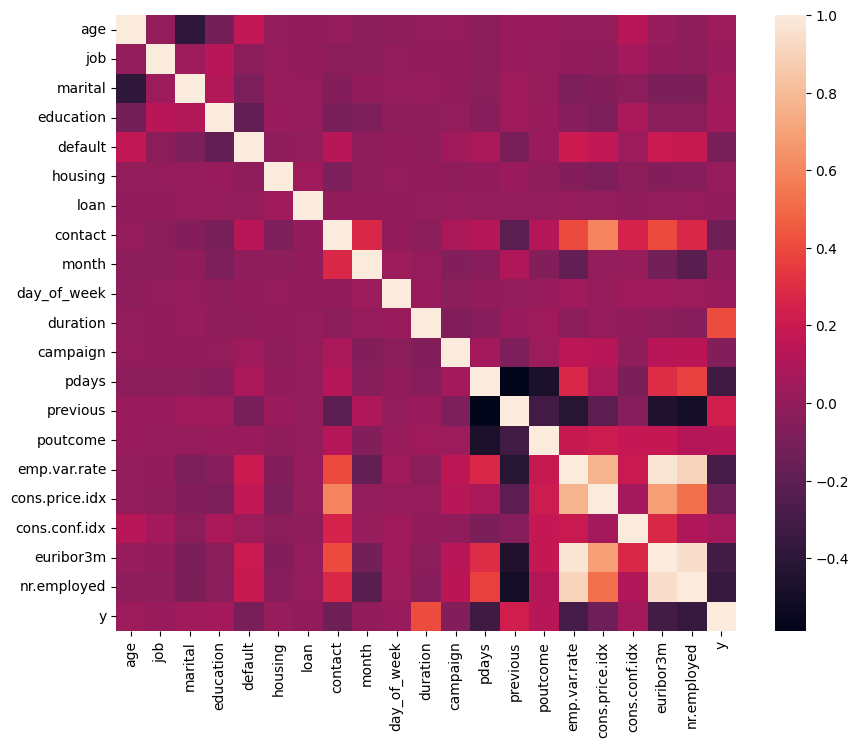

In [158]:
# Calculate correlations
corr = encoded_bank.corr()

# Use seaborn to plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr)

plt.show()

# Scaling
Scale numerical features which particularly useful for data with outliers, for example in age feature.

In [291]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
encoded_bank[encoded_bank.columns] = scaler.fit_transform(encoded_bank[encoded_bank.columns])

encoded_bank.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.200000,0.142857,0.0,-0.75,0.0,-1.0,0.0,1.0,0.666667,-0.5,0.373272,-0.5,0.0,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0.0
1,1.266667,0.714286,0.0,0.00,1.0,-1.0,0.0,1.0,0.666667,-0.5,-0.142857,-0.5,0.0,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0.0
2,-0.066667,0.714286,0.0,0.00,0.0,0.0,0.0,1.0,0.666667,-0.5,0.211982,-0.5,0.0,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0.0
3,0.133333,-0.285714,0.0,-0.50,0.0,-1.0,0.0,1.0,0.666667,-0.5,-0.133641,-0.5,0.0,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0.0
4,1.200000,0.714286,0.0,0.00,0.0,-1.0,2.0,1.0,0.666667,-0.5,0.585253,-0.5,0.0,0.0,0.0,0.0,0.266594,0.857143,0.0,0.0,0.0


# Logistic Regression Classification

In [292]:
# Split data into features and target variable (y)
X = encoded_bank.drop('y', axis=1)
y = encoded_bank['y'] #target variable

In [293]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [294]:
# dealing wiith imbalanced data between target output yes and no
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [295]:
# choose classification model and train
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

C:\Users\fanzu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [296]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8548191308570041
              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      7303
         1.0       0.43      0.87      0.58       935

    accuracy                           0.85      8238
   macro avg       0.71      0.86      0.74      8238
weighted avg       0.92      0.85      0.87      8238



Interpretation:
- The accuracy is approx. 91%, indicating the model correctly predicted the outcome y about 91% of the outcome in the test set
- Test set size is 8238 instances which divided into 935 instances of class 1 (yes) and 7303 instances of class 0 (no)
- the model performs better at predicting class 0, which is indicated by high precision, recall, and f1-score (>90%)
- however, it doesn't perform well at predicting class 1, escpecially in terms of recall / sensitivity. the model only correctly predicted 41% of the actual positive instances
- the model struggles to predict clients who choose to subscribe a term deposit
 

In [297]:
# Make predictions using the model
y_pred = model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[6227 1076]
 [ 120  815]]


In [298]:
# Get the coefficients (weights) of the features
coefficients = model.coef_[0]

# Create a DataFrame to display coefficients with corresponding feature names
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort features by importance
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

coefficients_df

,Feature,Coefficient
10,duration,1.459772
14,poutcome,0.466623
16,cons.price.idx,0.421348
3,education,0.330882
17,cons.conf.idx,0.283618
2,marital,0.167890
0,age,0.120332
5,housing,0.072289
9,day_of_week,0.061549
1,job,0.058240


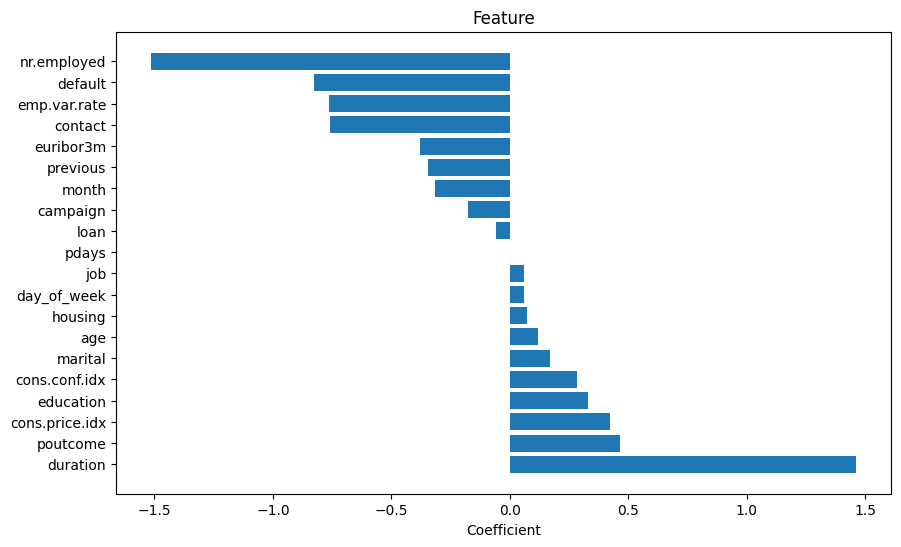

In [299]:
# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Coefficient')
plt.title('Feature')
plt.show()


- Duration: The feature 'duration' has the highest positive coefficient, suggesting a strong positive influence on the target. A longer 'duration' may correlate with a higher likelihood of client interested to subscribe to term deposit
- Cons.Price.Index (Consumer Price Index) and Cons.Conf.Index (Consumer Confidence Index) show a moderate positive influence indicating their positive influence on the target. This may related to both high consumer price index and consumer confidence index are the indicators for consumer spending behavior and changes in cost of living, 
- Poutcome (Outcome of Previous Campaign) has a higher positive coefficient, suggesting a moderate positive relationship with the target. Previous subscriber are more likely to subscribe again it the next period.
- Features like 'housing', 'education', 'day_of_week', 'marital', and 'age' exhibit mild positive associations with the target but with smaller coefficients.
- 'Job', 'loan', 'pdays', 'campaign', 'previous', and 'euribor3m' have coefficients close to zero, indicating relatively weaker or negligible influence on the target.
- Features like 'contact', 'nr.employed', 'emp.var.rate', and 'default' show notable negative influences on the target.

# Decision Tree Classification

In [314]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(random_state=42, max_depth=8)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [315]:
# Predict on the test set
y_pred = dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.8652585579024035
              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92      7303
         1.0       0.45      0.87      0.59       935

    accuracy                           0.87      8238
   macro avg       0.72      0.87      0.76      8238
weighted avg       0.92      0.87      0.88      8238



In [316]:
# Make predictions using the model
y_pred = dt.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[6318  985]
 [ 125  810]]


In [317]:
# Get the coefficients (weights) of the features
dt_importance = dt.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features by importance
print(importance_df)

           Feature  Importance
10        duration    0.314872
18       euribor3m    0.114372
0              age    0.092079
19     nr.employed    0.051615
1              job    0.048329
3        education    0.042145
11        campaign    0.042029
9      day_of_week    0.041196
14        poutcome    0.033268
12           pdays    0.032540
17   cons.conf.idx    0.026404
16  cons.price.idx    0.025610
15    emp.var.rate    0.024762
2          marital    0.023311
5          housing    0.020398
8            month    0.019363
6             loan    0.015264
13        previous    0.012391
7          contact    0.010682
4          default    0.009371


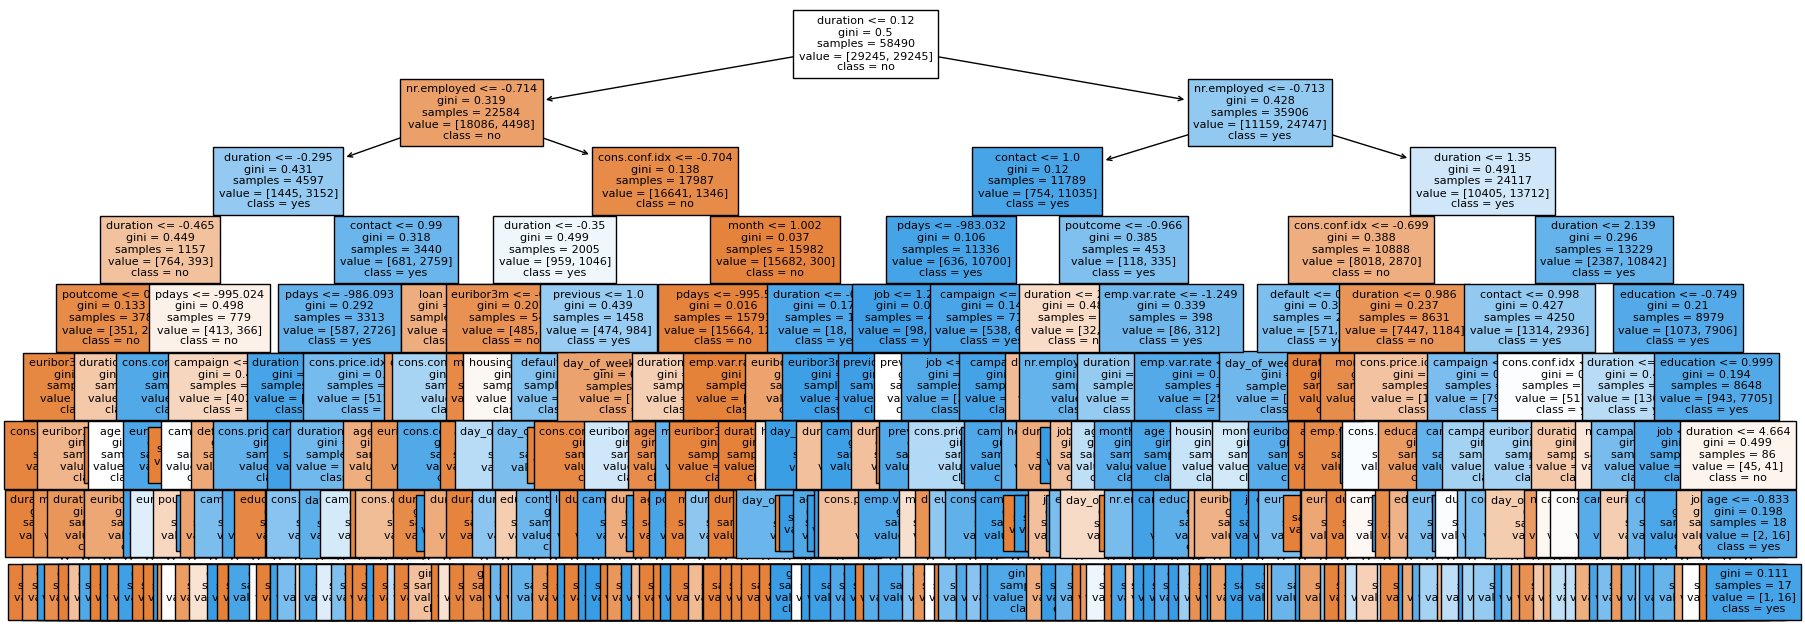

In [318]:
# Plotting the decision tree
plt.figure(figsize=(22, 8))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['no', 'yes'], fontsize=8)
plt.show()


Comparison:
- Both models have similar overall accuracy, precision, and weighted average F1-scores.
- Both models perform well in predicting the majority class (Class 0, no) with high accuracy and balanced precision-recall scores.
- For the target output class (Class 1, yes), both model has a slightly higher recall, indicating they can better identify positive instances, but at the cost of a slightly lower precision (0.43 for both models).
- Both model seem to give similar result in duration and nr.employed (number of employees) as important features. Although there are some differences, such as  euribor3m and age feature, which middle to lower importance in logistic regression but high in decision tree.